In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [13]:

# Load dataset
df = pd.read_csv("PRC_Data_Breach_Chronology.csv")


In [14]:
# Clean data
df.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15"], inplace=True, errors='ignore')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.fillna('missinginfo', inplace=True)

In [15]:
# Grouping data for analysis
grouped_data = df.groupby(['Type of breach', 'Type of organization']).first()

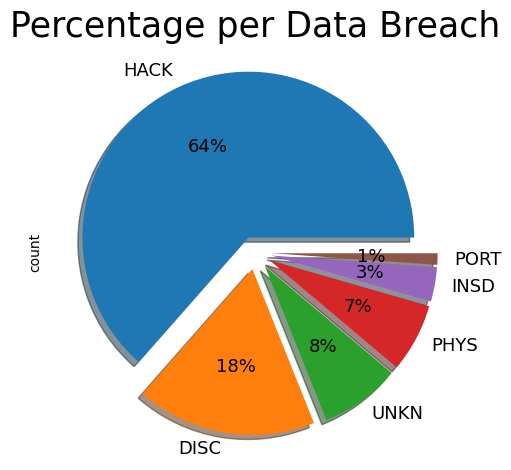

In [16]:
# Pie chart - Percentage per Data Breach type
df['Type of breach'].value_counts().plot.pie(autopct='%1.0f%%', fontsize=13, shadow=True, explode=[0.1]*6)
plt.title('Percentage per Data Breach', fontsize=25)
plt.tight_layout()
plt.show()

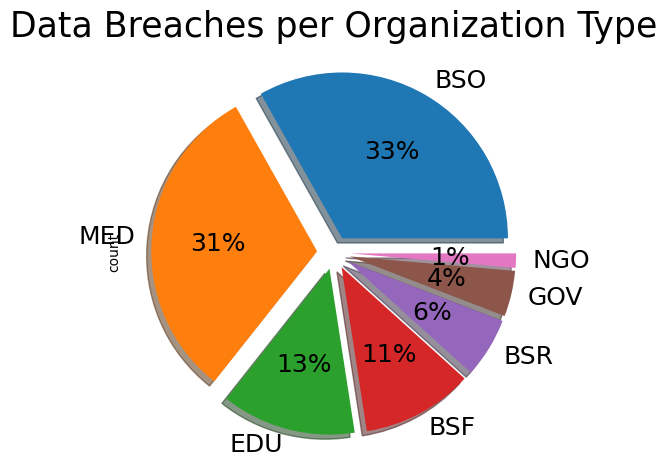

In [17]:
# Pie chart - Data breaches per organization type
df['Type of organization'].value_counts().plot.pie(autopct='%1.0f%%', fontsize=18, shadow=True, explode=[0.1]*7)
plt.title('Data Breaches per Organization Type', fontsize=25)
plt.tight_layout()
plt.show()

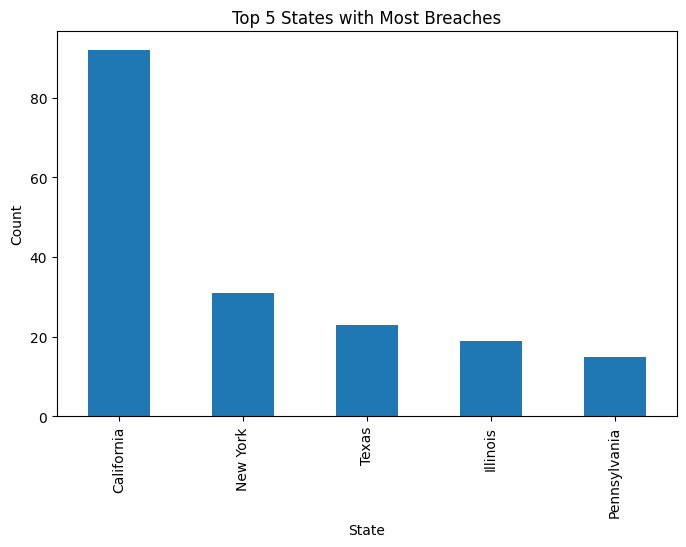

In [18]:
# Bar chart - Top 5 states with most breaches
top5_states = df['State'].value_counts().nlargest(5)
top5_states.plot(kind='bar', figsize=(8, 5))
plt.title("Top 5 States with Most Breaches")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

In [19]:
# Text preprocessing function
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def text_preproc(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = re.sub(r'https*\S+|@\S+|#\S+|\d+', '', text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    return text

In [21]:
# Apply text preprocessing
df['text'] = df['Description of incident'].astype(str).apply(text_preproc)

In [22]:
# Altair bar chart - Data Breach Types
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Type of breach"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of breaches')),
    tooltip=[alt.Tooltip('count()', title='Number of breaches'), 'Type of breach'],
    color='Type of breach'
)

In [23]:
text = bars.mark_text(align='center', baseline='bottom').encode(text='count()')
(bars + text).interactive().properties(height=300, width=700, title="Total Number per Data Breach Type")


alt.LayerChart(...)

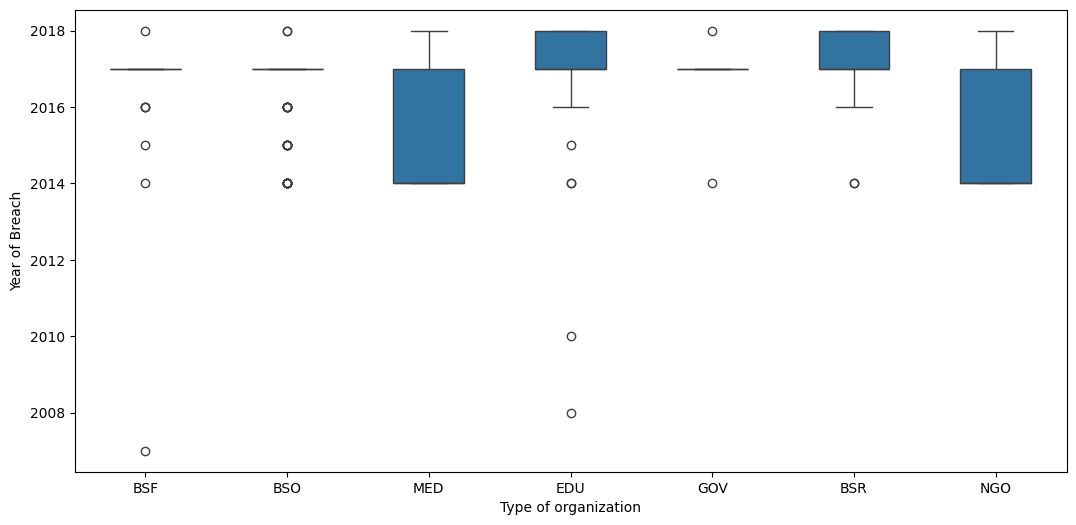

In [24]:
# Box plots
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Type of organization', y='Year of Breach', width=.5)
plt.show()

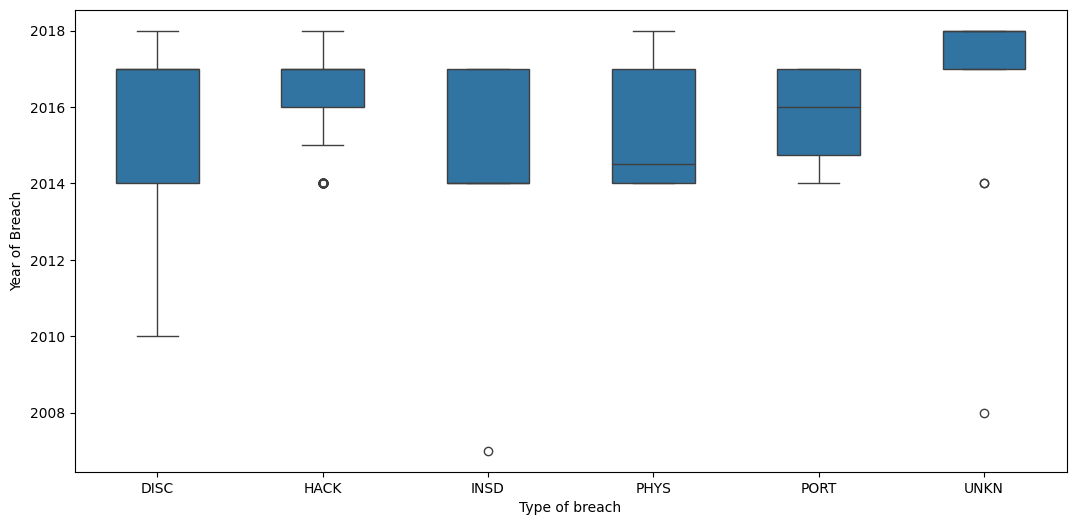

In [25]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Type of breach', y='Year of Breach', width=.5)
plt.show()

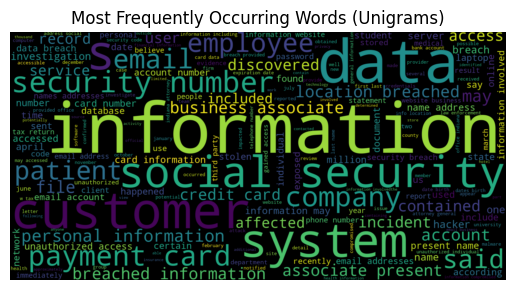

In [26]:
# Word Cloud
txt_data = ' '.join(df['text'])
word_cloud = WordCloud(max_words=200, height=1000, width=2000).generate(txt_data)
plt.title('Most Frequently Occurring Words (Unigrams)')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_cloud.to_file("WordCloud_Unigrams_frequent_words.png")
